<a href="https://colab.research.google.com/github/Alfonso-Garibay/computer-vision-course-Equipo-15/blob/main/6_segmentation_otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

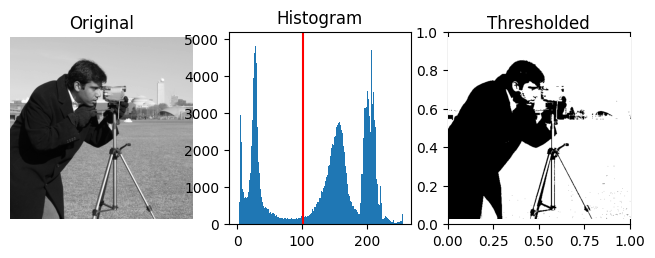

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




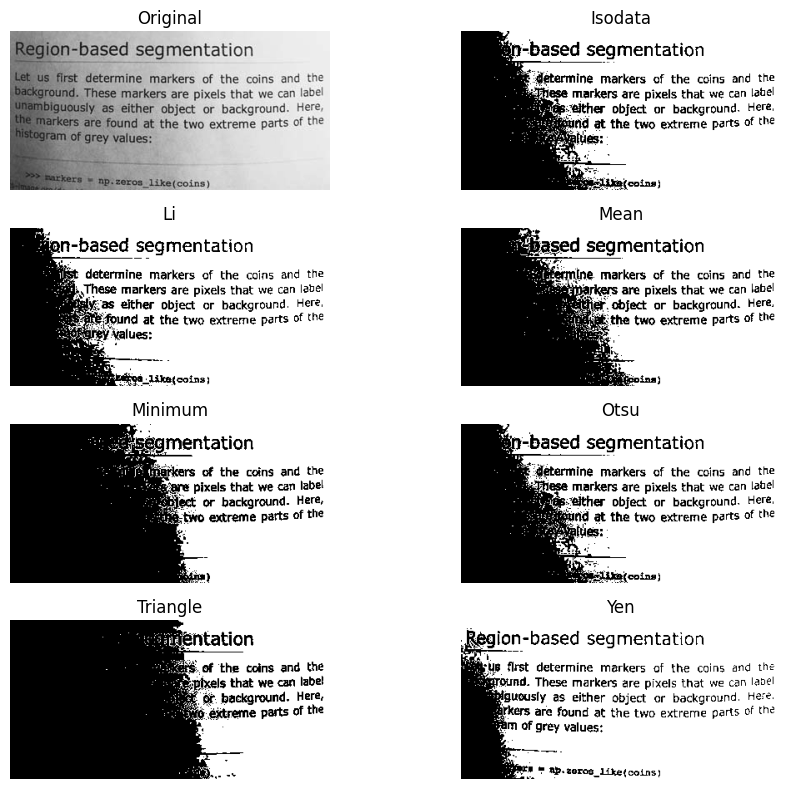

In [ ]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

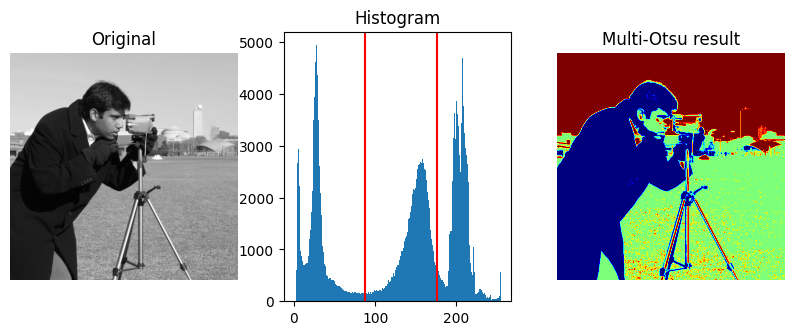

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

### 3. **Experimentar con diferentes imagenes, seleccionar imagenes con diferentes backgrounds y estilos, definir cuales son las limitaciones de single thresholding contra el algoritmo de Otsu**

El método de Otsu es una técnica utilizada para determinar automáticamente el umbral más óptimo para la segmentación de imágenes. Funciona calculando la varianza dentro de dos clases de píxeles: los que se consideran de primer plano y los que se consideran de fondo. El método calcula de forma iterativa el umbral que maximiza la suma ponderada de las varianzas entre estas dos clases (Medium, 2024).

### Single Thresholding

In [ ]:
def single_thresholding_otsu(image):
    thresh = threshold_otsu(image)
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()


def try_all(img):
    fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
    plt.show()



def multi_thresholding_otsu(image):
    thresholds = threshold_multiotsu(image)

    regions = np.digitize(image, bins=thresholds)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu result')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()

In [ ]:
from skimage.io import imread
monedas = imread('data/monedas.png', as_gray=True)
aguila = imread('data/aguila.jpg', as_gray=True)
endodoncia = imread('data/endo2.jpg', as_gray=True)

imagenes = [monedas, aguila, endodoncia]

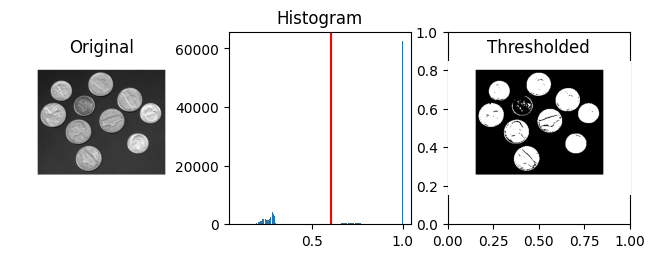

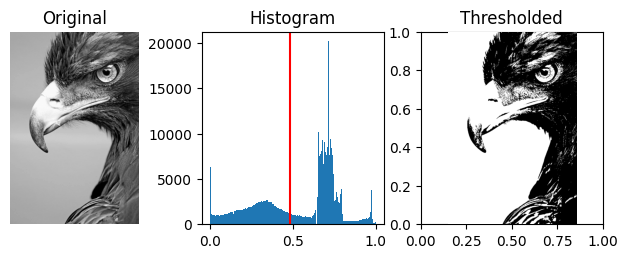

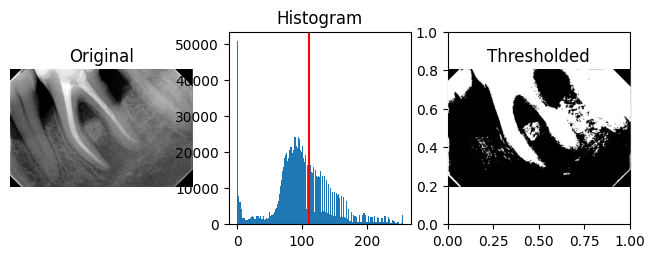

In [ ]:
for img in imagenes:
    single_thresholding_otsu(img)

###**Limitaciones del método Otsu de umbral único**

Una limitación del método Otsu de umbral único que es evidente es que supone que sólo hay dos clases en la imagen: el primer plano y el fondo. Esta suposición no siempre es útil en todos los casos, especialmente aquellos en los que la segmentación debe realizarse en primer plano o cuando la imagen presenta diferentes colores. Un caso particular de esto es cuando se busca segmentar un color de la imagen en particular, para este caso el método Otsu no es la solución ideal.

Otra limitación del método Otsu de umbral único se presenta en imágenes que tienen histogramas con más de dos picos o distribuciones más complejas, ya que solo puede determinar un valor de umbral por lo que el resultado podría no ser representativo de la imagen. También puede conducir a resultados pobres en imagenes con poca iluminación y con alta cantidad de ruido.


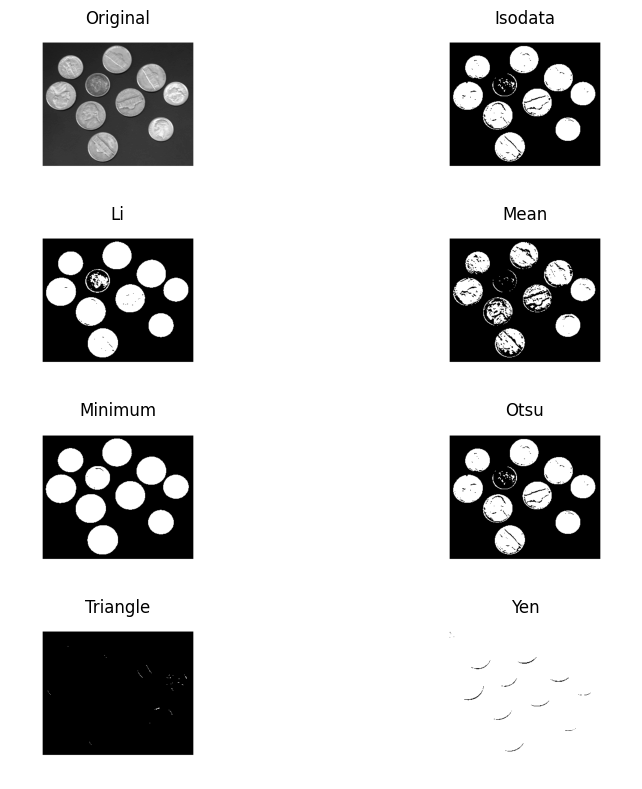

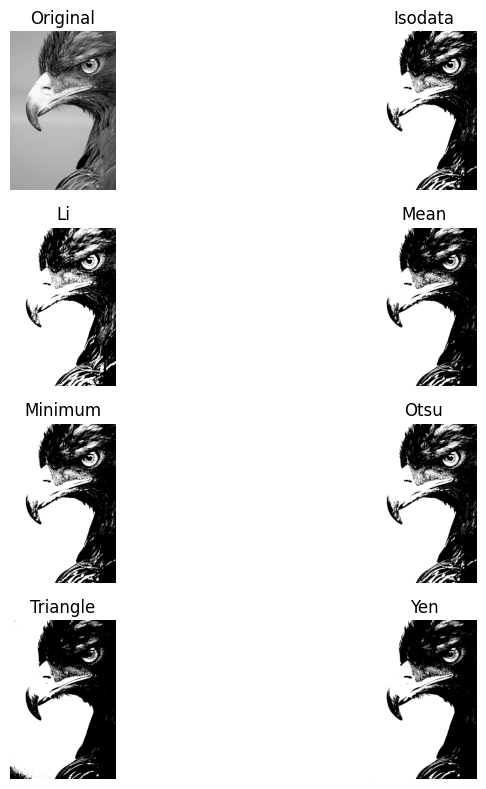

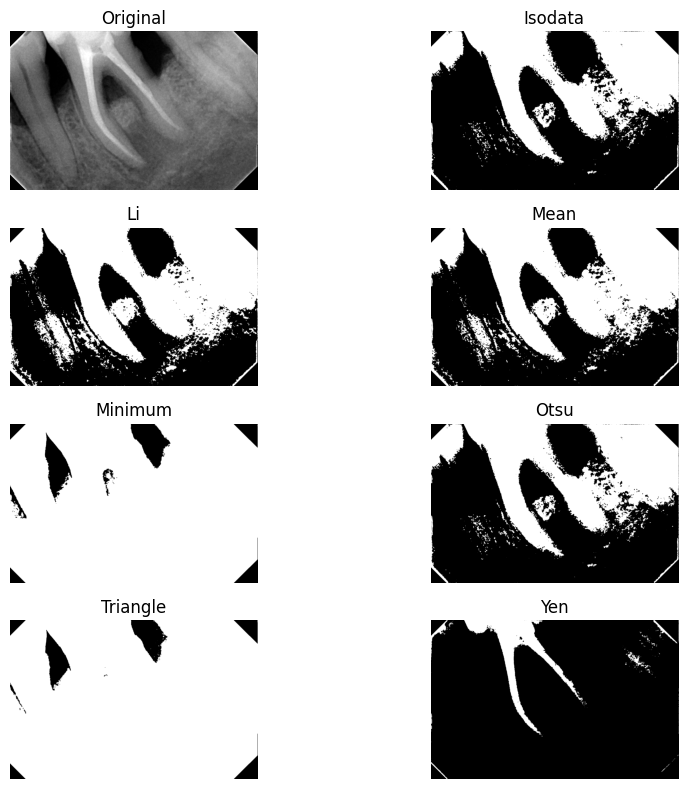

In [ ]:
for img in imagenes:
    try_all(img)

### Multi Thresholding

El método Otsu de umbrales múltiples es un algoritmo de umbralización que se utiliza para separar los píxeles de una imagen de entrada en varias clases diferentes, cada una obtenida según la intensidad de los niveles de gris dentro de la imagen. Es una extensión del método de umbral único  porque la medida de separabilidad en la que se basa también se puede extender a un número arbitrario de clases (Gonzalez, R. & Woods, R., 2018).

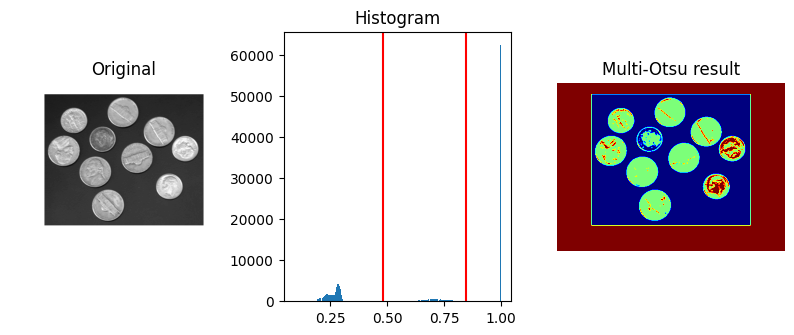

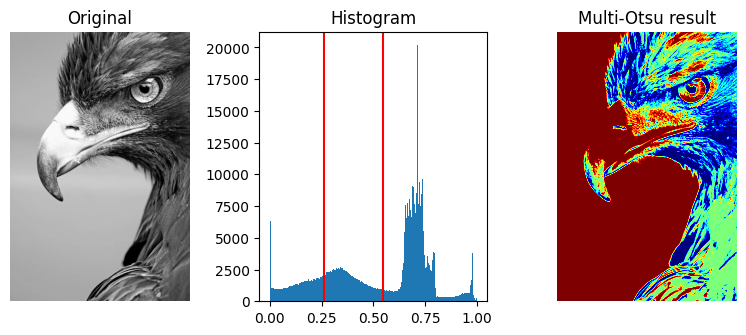

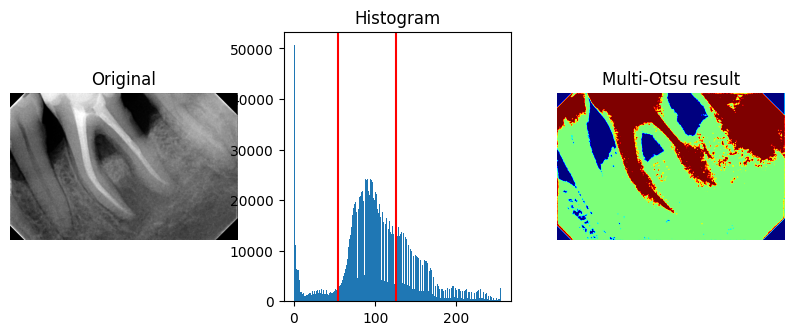

In [ ]:
for img in imagenes:
    multi_thresholding_otsu(img)

### **Método Otsu de umbrales múltiples**

El espacio de color RGB (Red, Green, Blue) utilizado es este ejercicio muestra que su uso, además de popular, es bastante intuitivo. Este método es especialmente utilizado en imagenes a color ya que permite al usuario segmentar la imagen en varias regiones. El resultado de cada color en la imagen segmentada es una combinación de las distintas intensidades y los umbrales utilizados .

**BIBLIOGRAFÍA**

Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.

Medium, “Thresholding and Otsu’s Method for Image
Segmentation”, 2024. [Online]. Available:  https://cyrillugod.medium.com/thresholding-and-otsus-method-for-image-segmentation-34f1853d9d10. [Accessed March 08, 2024].